In the last file, we learned how to incorporate **k-fold cross-validation** into our model creation in `caret`. We saw that `caret` actually does some extra work under the hood to figure out an optimal number of neighbors to use with the training data. All we need to do is supply the model with data, but it's important to understand what `caret` is doing in choosing this optimal number.

In this file, we'll have a closer look at this process and learn how to manage it ourselves in `caret`. Up until now, we've mainly focused on cleaning the data and preparing it for the model, but here we will focus on how using different amounts of neighbors — the `k` of k-nearest neighbors — affects model performance. The number of neighbors, `k`, is a facet of the algorithm itself, which we call a **hyperparameter** or **model parameter**. We will refer to them as hyperparameters.

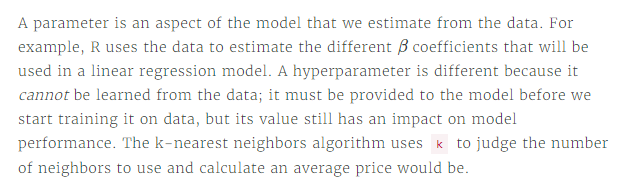

The end goal of creating a machine learning model is to create a model that performs well on new data. In pursuit of this, our goal then is to pick a value of `k` that minimizes the test error. Throughout this file, we'll learn how to perform the process of finding this optimal hyperparameter value.

**Task**

Use `createDataPartition()` to split the data the data according to an 80-20 split. In other words, 80% of the rows should be delegated to the training set and the other 20% should be given to the test set.

**Answer**

`set.seed(1)
library(caret)
train_indices <- createDataPartition(y = dc_listings[["tidy_price"]], 
                                     p = 0.8, 
                                     list = FALSE)`
                                     
`train_listings <- dc_listings[train_indices,]
test_listings <- dc_listings[-train_indices,]`

We were introducted to the idea of hyperparameters, values that affect the behavior and performance of a machine learning model but are unrelated to the data. Since we don't know which hyperparameter values are the best ahead of time, we need to figure that out. The process of finding the optimal hyperparameter value is known as [hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization).

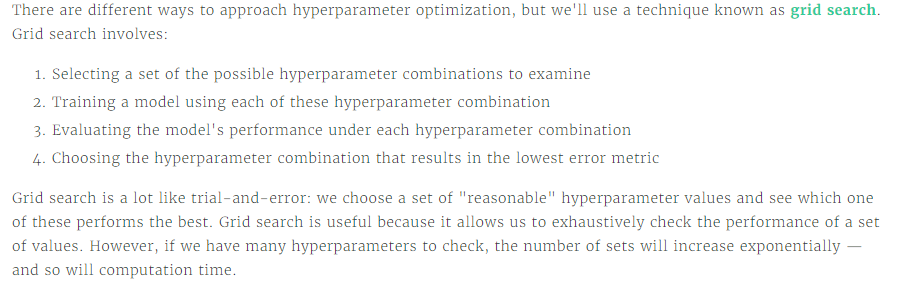

We'll focus on the first step of grid search. In order for a `caret` model to perform grid search, we need to create a dataframe containing the different hyperparameter combinations. K-nearest neighbors has only one parameter —`k`— so we will just be choosing a range of `k` values to test out. 

`caret` offers a convenient function for us to create this data frame: the `expand.grid()` function. The `expand.grid()` function takes vectors of hyperparameters and creates a data frame containing every possible combination of these vectors. We have a use case below:

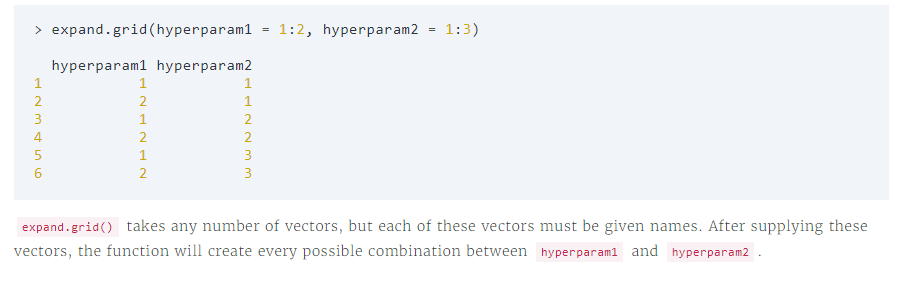

**Task**

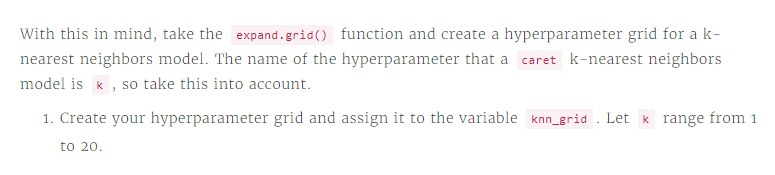

**Answer**

`set.seed(1)
library(caret)
train_indices <- createDataPartition(y = dc_listings[["tidy_price"]], 
                                     p = 0.8, 
                                     list = FALSE)`
                                     
`train_lisitings <- dc_listings[train_indices,]
test_lisitings <- dc_listings[-train_indices,]`

`knn_grid <- expand.grid(k = 1:20)`

Now that we have our set of hyperparameter values to test, we need to supply them to the k-nearest neighbors models as we train them. In the last file, we didn't specify what hyperparameters to experiment with, so `caret` creates its own grid in the background to use. While this is convenient, we typically want to explicitly specify the hyperparameter combinations we want to use because it gives us greater control of the model training process.

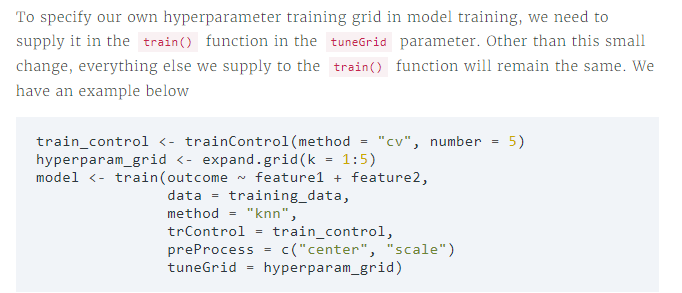

Once we specify our own hyperparameter grid, it's important to make sure that the column names match up with the hyperparameters used in the machine learning model it's being paired with. For example, if we were using another machine learning model like random forest, we would need to name the vectors differently in `expand.grid()`. Thankfully, the `train()` function automates the training and evaluation process for each hyperparameter. After this process, `caret` automatically chooses the best hyperparameter and the `train()` function uses this optimal value in the returned model.

**Task**

Create a trained k-nearest neighbors model that uses our own hyperparameter grid. Use 5-fold cross-validation, normalize the data and assign the final model to the variable `knn_model`.
    * We'll be using the `accommodates`, `bedrooms` and `bathrooms` features.
    
**Answer**

`set.seed(1)
library(caret)
train_indices <- createDataPartition(y = dc_listings[["tidy_price"]], 
                                     p = 0.8, 
                                     list = FALSE)`
                                     
`train_listings <- dc_listings[train_indices,]
test_listings <- dc_listings[-train_indices,]`

`knn_grid <- expand.grid(k = 1:20)
train_control <- trainControl(method = "cv", number = 5)`

`knn_model <- train(tidy_price ~ accommodates + bedrooms + bathrooms,
                   data = train_listings,
                   method = "knn",
                   trControl = train_control,
                   preProcess = c("center", "scale"),
                   tuneGrid = knn_grid)`

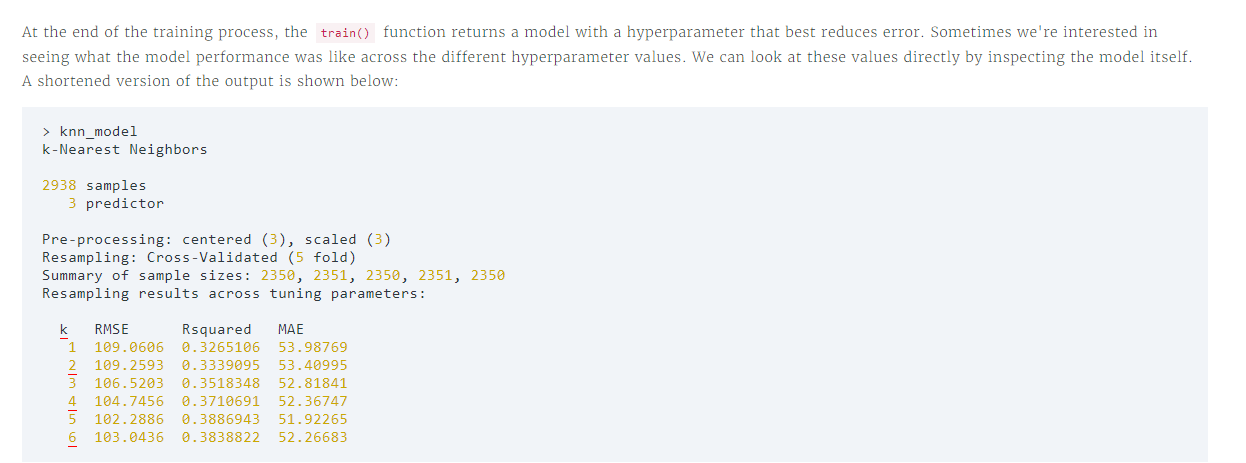

If our number of hyperparameter combinations is high, it would be better to visualize these values for direct inspection. Instead of looking at the model itself, we can put the `caret` model into the `plot()` function. The output would be a quick graph showing how each of the hyperparameters performs.

`plot(knn_model)`

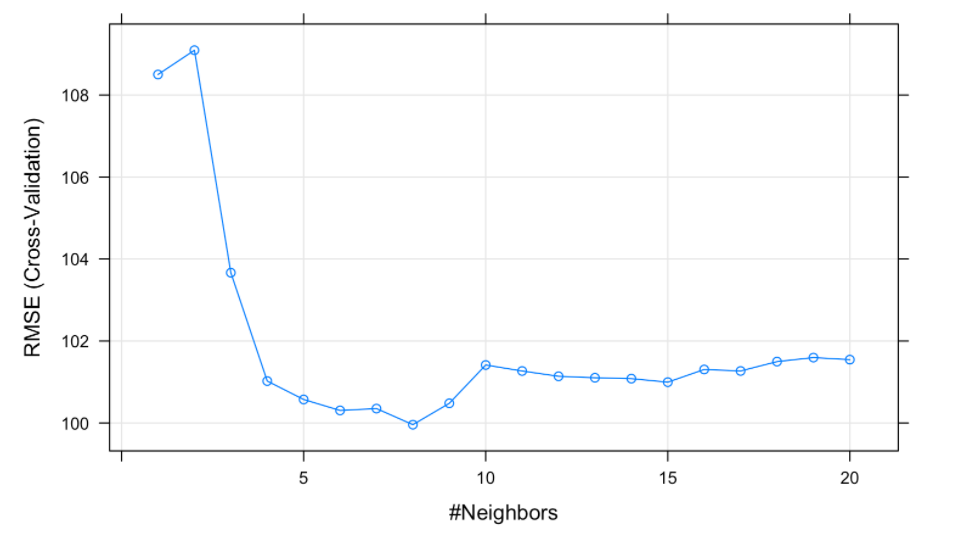

The information contained in the plot is the same as that presented when looking at the variable containing the `caret` model. We can see that most of the RMSEs are between 100 and 102. For the most part, hyperparameter optimization won't drastically change the resulting error, but it still represents a method for us to improve our models.

It is good practice to choose a wide set of values when we start experimenting with sets of hyperparameters to use in our machine learning models. Above, we learned how to use the `plot()` function with a trained `caret` model to see how each hyperparameter we chose performed.

By examining the plot, it's easy to identify when the hyperparameters start to reach a minimum. The point where the plot reaches a minimum is the hyperparameter that is chosen for the final model. Let's say that when we first created our hyperparameter grid that we started with just a few values for `k`. Doing so will produce the following plot:

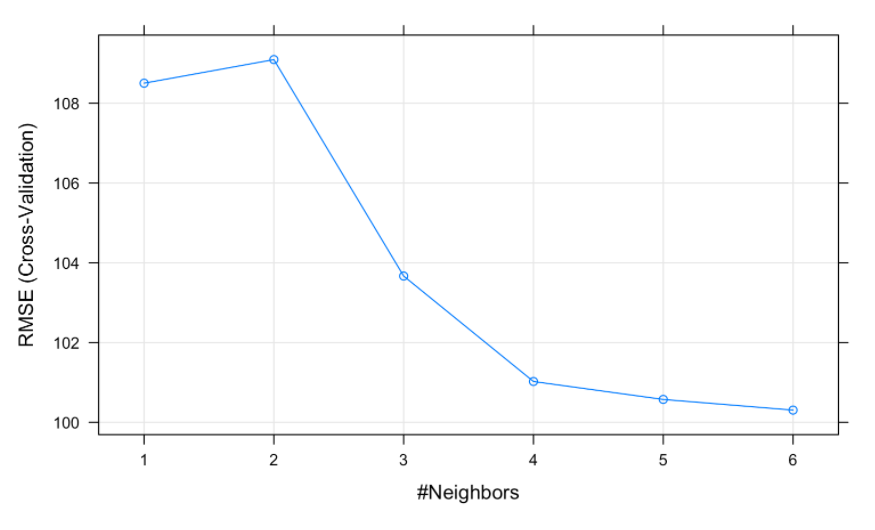


In the plot above, notice that it quickly reaches a minimum, but then stops short. If we continue on with this information, we don't know if choosing more neighbors would result in lower error metrics. As a rule of thumb, we should choose a wide set of hyperparameter combinations so that a clear minimum or floor is created when we examine performance across different hyperparameters. 

In other words, we'll look for a clear **U-shaped curve**, with an identifiable minimum. We may find that the error instead reaches low floor and that's okay. It's just important to set our range of hyperparameters wide enough that we can see this minimum or floor.

Before we wrap up, it's a good idea to tie some of concepts together. Hyperparameter optimization takes a set of hyperparameters and tests our machine learning model performance using each of them. Each hyperparameter produces an error metric (RMSE, MAE, etc.) that is used to judge which one is optimal for the data and model. But it's important to really distinguish which dataset is being used to calculate the error metrics when we're choosing hyperparameters.

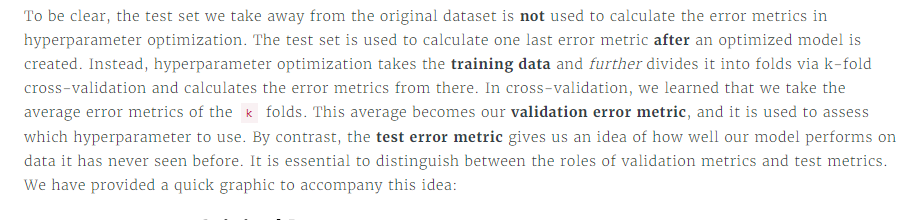

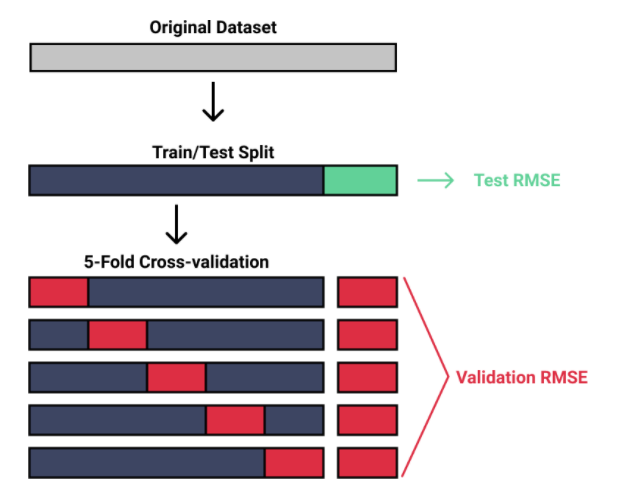

Notice that the folds are all taken from just the training data. This is important because it prevents the model from using the test data at all during the training process. We still need an idea of what hyperparameters will work best with our data, so we can further subdivide the training data into folds to emulate the practice of "testing on data the model hasn't seen yet". Each of the points we see when we plot out the error metrics by hyperparameter the average of the errors in the `k` folds.

To reiterate, cross-validation helps us select the best hyperparameters to use in our machine learning model. Test error tells us if our model is generalizable or not. These concepts will help guide our programming as we learn more and more machine learning algorithms.

**Task**

How many times should the test data used in assessing model performance?

**Answer**

`times_test_data_used <- 1` # The test data should only be touched after we have our final model!

`caret` is an amazing library and really streamlines the process of vetting and creating machine learning models, so that we can focus on machine learning itself and not the gritty implementation details.

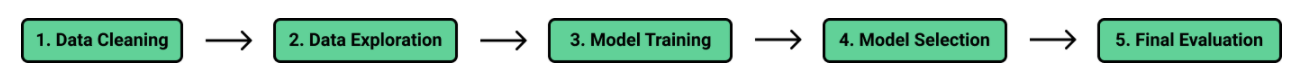

The workflow we learned can be easily generalized to other algorithms, different forms of cross-validation, and new datasets. Rather than talk about this process in the abstract, we slowly worked through each step as we progressed through. 

As we mature as a data scientist, it's always good to keep a framework of how to approach a machine learning problem.